## 5.1 分类问题

#### 知识点总结：

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [2]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]))
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size])+ 0.1)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs

In [23]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs:v_xs})
# 作用：输出正确的预测结果
# 利用tf.argmax()按行求出真实值y_、预测值y最大值的下标，
# 用tf.equal()求出真实值和预测值相等的数量，也就是预测结果正确的数量，
# tf.argmax()和tf.equal()一般是结合着用。
    correct_prediction = tf.equal(tf.arg_max(y_pre,1), tf.arg_max(v_ys,1))
# tf.cast()函数的作用是执行 tensorflow 中张量数据类型转换。
# 此处是将布尔型转换为float32
# 例如：
# [True,False,True,True]可以用[1,0,1,1]表示，精度为0.75。
# 0.75 = 3/4
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs:v_xs, ys:v_ys})
    return result

**笔记**：

【问题1】：
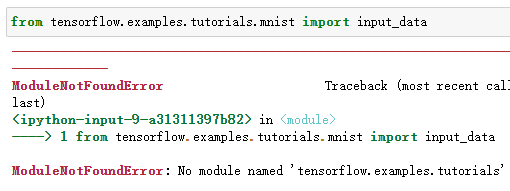
【原因】：在tensorflow的examples文件夹下没有tutorials文件夹，所以才找不到
【方法】：去官网https://github.com/tensorflow/tensorflow 下载并将tutorials 文件夹复制到python的libs路径中。
我的文件路径：`D:\ProgramData\Anaconda3\envs\tensor\Lib\site-packages\tensorflow_core\examples`
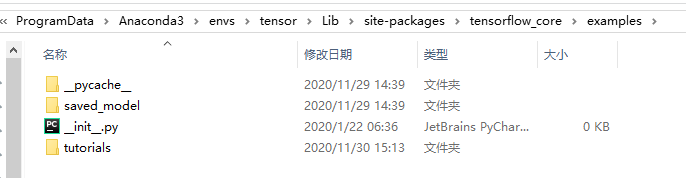

MNIST库是手写体数字库，差不多是这样子的
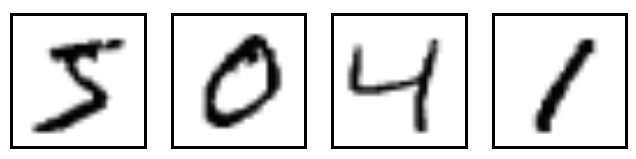

数据中包含55000张训练图片，每张图片的分辨率是28×28，所以我们的训练网络输入应该是28×28=784个像素数据。

In [14]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [13]:
xs = tf.placeholder(tf.float32, [None, 784])#28*28
# 每张图片都表示一个数字，所以我们的输出是数字0到9，共10类。
ys = tf.placeholder(tf.float32, [None,10])

调用add_layer函数搭建一个最简单的训练网络结构，只有输入层和输出层。
其中输入数据是784个特征，输出数据是10个特征，激励采用softmax函数，网络结构图是这样子的
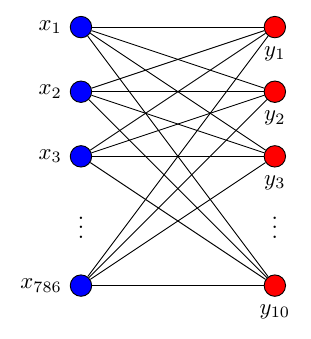

In [15]:
prediction = add_layer(xs, 784, 10, activation_function=tf.nn.softmax)

**Cross entropy loss（交叉熵）**

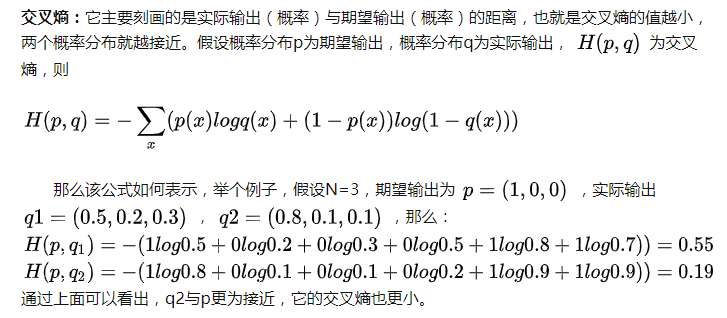
参考链接：https://zhuanlan.zhihu.com/p/98785902

In [16]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction), 
                                              reduction_indices=[1]))

**train方法（最优化算法）采用梯度下降法：**

In [17]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.Session()

In [18]:
init = tf.global_variables_initializer()
sess.run(init)

**训练**

现在开始train，每次只取100张图片，免得数据太多训练太慢。

每训练50次输出一下预测精度

In [24]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs:batch_xs, ys:batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(mnist.test.images, mnist.test.labels))

0.1673
0.6457
0.7482
0.7867
0.8121
0.8185
0.8305
0.8417
0.8483
0.8537
0.86
0.8645
0.867
0.8661
0.8656
0.8694
0.8736
0.8741
0.8781
0.8804
